In [95]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [96]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [97]:
len(X_train) 

60000

In [98]:
len(X_test) 

10000

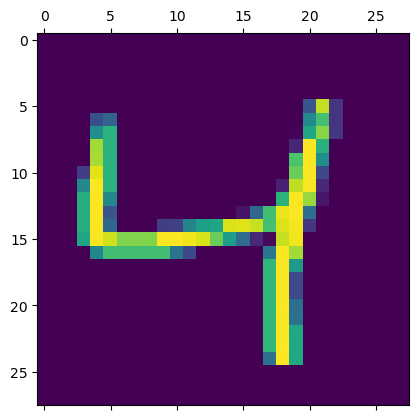

In [99]:
plt.matshow(X_train[2])

In [100]:
X_train.shape

(60000, 28, 28)

In [101]:
X_train = X_train / 255
X_text = X_test / 255

In [102]:
X_train.shape 

(60000, 28, 28)

In [103]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
print(X_test_flattened.shape)
print(X_train_flattened.shape)

(10000, 784)
(60000, 784)


In [104]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = "sigmoid")
   
    
])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy"
              )
model.fit(X_train_flattened, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4727 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2837 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2666 - accuracy: 0.9251


In [105]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 49.6317 - accuracy: 0.9061


[49.631736755371094, 0.9060999751091003]

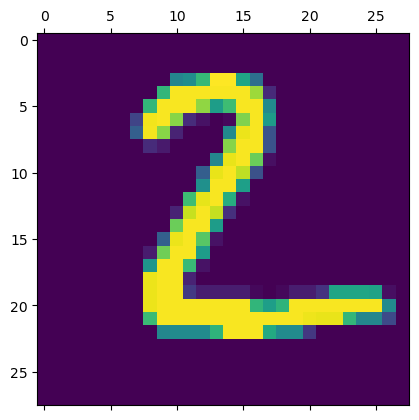

In [106]:
plt.matshow(X_test[1])

In [107]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([1., 0., 1., 0., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [108]:
np.argmax(y_predicted[1])

0

In [109]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[3, 0, 1, 0, 4, 1, 4, 9, 6, 4]

In [110]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [111]:
cm= tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    1,    0,    0,    1,    0,    3,    0],
       [   0, 1124,    6,    1,    0,    2,    2,    0,    0,    0],
       [  82,  101,  823,    4,   12,    0,    4,    1,    4,    1],
       [  38,    5,  254,  701,    1,    5,    1,    2,    3,    0],
       [   4,    6,   15,   19,  921,    0,    8,    1,    7,    1],
       [  75,    8,   46,  236,   30,  467,    9,    1,   19,    1],
       [  72,    4,  338,    1,   60,   37,  445,    0,    1,    0],
       [  19,   22,   87,  366,   68,    4,    0,  456,    6,    0],
       [  18,   40,  140,  149,   25,   88,   17,   13,  483,    1],
       [  14,   13,    6,   87,  567,    8,    0,  187,   76,   51]])>

Text(95.72222222222221, 0.5, 'Truth')

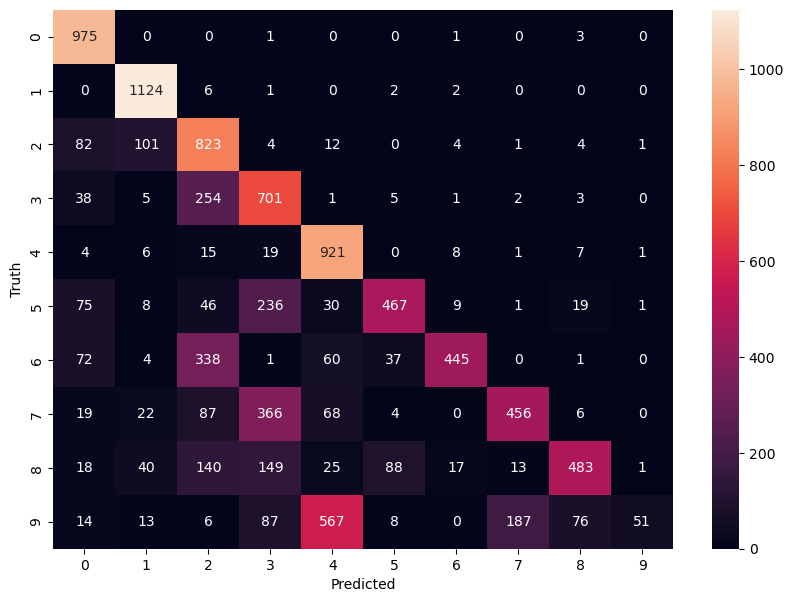

In [112]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
           

In [113]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
   
    
])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy"
              )
model.fit(X_train_flattened, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2797 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1286 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0674 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9840


In [114]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.5788 - accuracy: 0.9735


[13.57875919342041, 0.9735000133514404]

In [115]:
cm2= tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    1,    0,    0,    1,    0,    3,    0],
       [   0, 1124,    6,    1,    0,    2,    2,    0,    0,    0],
       [  82,  101,  823,    4,   12,    0,    4,    1,    4,    1],
       [  38,    5,  254,  701,    1,    5,    1,    2,    3,    0],
       [   4,    6,   15,   19,  921,    0,    8,    1,    7,    1],
       [  75,    8,   46,  236,   30,  467,    9,    1,   19,    1],
       [  72,    4,  338,    1,   60,   37,  445,    0,    1,    0],
       [  19,   22,   87,  366,   68,    4,    0,  456,    6,    0],
       [  18,   40,  140,  149,   25,   88,   17,   13,  483,    1],
       [  14,   13,    6,   87,  567,    8,    0,  187,   76,   51]])>

Text(95.72222222222221, 0.5, 'Truth')

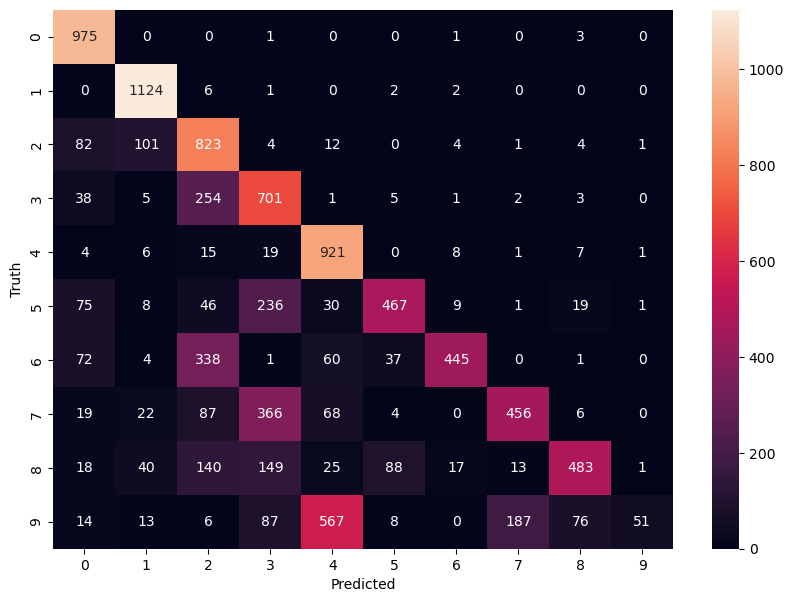

In [116]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
           

In [122]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
   
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy"
              )
model.fit(X_train, y_train, epochs =5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2703 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9842


In [119]:
%load_ext tensorboard 
%tensorboard --logdir logs/fit